<a href="https://colab.research.google.com/github/Shk-tech/my-colab-learning-material/blob/main/aice_test_cancer_patient(solution).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1
Pandas 함수로 2개 데이터 파일을 읽고 합쳐서 1개의 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
 - cancer_patient_a.csv파일을 읽어 데이터프레임 변수명 df_a에 할당하세요.
 - cancer_aptient_b.csv 파일을 읽어 데이터 프레임 변수명 df_b에 할당하세요.
 - df_a, df_b를 합쳐서 하나의 데이터프레임으로 만드세요. 판다스의 merge를 활용하세요
    - 기준 열 (on) : 'Patient Id'
    - 합치는 방법(how) : 'inner'


In [ ]:
import pandas as pd
df_a = pd.read_csv('cancer_patient_a.csv')
df_b = pd.read_csv('cancer_patient_b.csv')

df = pd.merge(df_a, df_b, how='inner', on='Patient Id')

# 1
df의 컬럼명에서 대문자를 소문자로 바꾸어 df에 다시 저장하세요.

In [ ]:
df.columns = df.columns.str.lower()

# 1
대기 오염에 대한 히스토그램을 보기 위해 countplot을 활용합니다.
 - seaborn의 countplot을 활용
 - x축 : air pollution
 - 색상(hue) : level

<Axes: xlabel='air pollution', ylabel='count'>

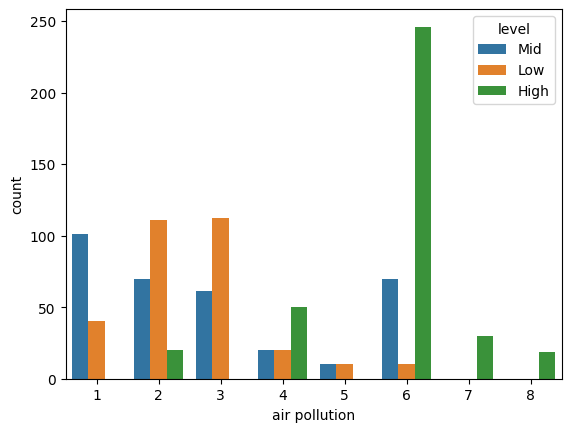

In [ ]:
import seaborn as sns
sns.countplot(df, x='air pollution', hue='level')

# 1
dust allergy와 level 사이의 관련성을 알아봅니다.
df의 dust allergy 칼럼을 분리해서 pandas Serial 형태로 dust 변수에 저장하세요.
df의 level 칼럼을 분리해서 pandas Serial 형태로 level 변수에 저장하세요.
두 시리즈를 crosstab 함수의 x, y에 활용하세요.
 - pandas의 crosstab 함수를 활용하세요.
 - x축(index) : dust allergy
 - y축(columns) : level
 - dropna : True

crosstab의 결과에서
 - 열의 순서를 Low, Mid, High 으로 바꾸세요.
 - 행의 순서를 Low, Mid, High 으로 바꾸세요.
 - corr 변수에 결과 저장

In [ ]:
dust = df['dust allergy']
level = df['level']
corr = pd.crosstab(index=dust, columns=level, dropna=True)
corr = corr.loc[['Low', 'Mid', 'High'], ['Low', 'Mid', 'High']]
corr

level,Low,Mid,High
dust allergy,,,
Low,180,41,10
Mid,113,161,80
High,10,130,275


# 1
레벨 별 dust allergy의 비율을 계산하세요
 - corr로부터 level별 합을 열 방향으로 구하여 total 변수에 저장하세요
 - corr를 total로 나누어 rate 변수에 저장하세요.

In [ ]:
total

,0
level,
Low,303
Mid,332
High,365


In [ ]:
total = corr.sum(axis=0)
rate = corr / total
rate

level,Low,Mid,High
dust allergy,,,
Low,0.594059,0.123494,0.027397
Mid,0.372937,0.484940,0.219178
High,0.033003,0.391566,0.753425


# 1
앞서 저장한 rate 변수를 heatmap으로 그리세요
 - seaborn heatmap 함수 활용
 - 데이터 텍스트 표현 (annot) : True
 - 텍스트 형식(fmt) : '.2f'

heatmap의 리턴값을 ax로 저장 후 옵션 적용
 - X축 라벨(xlabel) : 'LEVEL'
 - y축 라벨(ylabel) : 'DUST ALLERGY'

Text(50.722222222222214, 0.5, 'DUST ALLERGY')

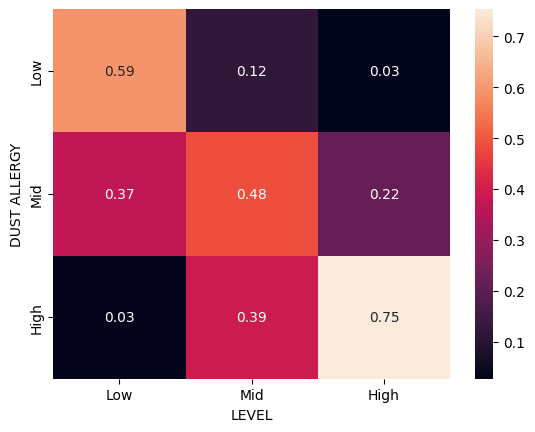

In [ ]:
ax = sns.heatmap(rate, annot=True, fmt='.2f')
ax.set_xlabel('LEVEL')
ax.set_ylabel('DUST ALLERGY')

# 1
불필요한 데이터를 삭제합니다.
 - patient id 칼럼을 삭제
 - 처리 결과를 df2에 저장

In [ ]:
df2 = df.drop(['patient id'], axis=1)

# 1
결측치를 처리합니다.
 - object타입의 범주형 데이터 결측치에는 'Unknown'을 넣으세요
 - 수치형 데이터의 결측치는 제거하세요.
 - 쳐리 결과를 df3에 저장

In [ ]:
df3 = df2.copy()
a = df2.loc[:, df2.dtypes == 'object']
df3.loc[:, df2.dtypes == 'object'] = a.fillna('Unknown')
df3 = df3.dropna(axis=0)

# 1
level의 Low, Mid, High를 각각 0, 1, 2로 변환하여 level에 다시 저장하세요.


smoking열과 passive smoker열의 합을 구하여 total smoking 칼럼에 저장하세요.

 - 처리 결과를 df4에 저장.

In [ ]:
df4 = df3.copy()
df4['level'] = df2['level'].replace({'Low':0, 'Mid':1, 'High':2})

In [ ]:
df4['total smoking'] = df2['smoking'] + df2['passive smoker']

# 1
가이드에 따라 원-핫 인코딩을 수행합니다.
 - 대상 : df4의 모든 범주형 데이터
 - 활용 함수 : pandas 의 get_dummies
 - 전처리가 반영된 결과를 df5에 저장하세요.

In [ ]:
df5 = pd.get_dummies(df4)

# 1
 - 데이터를 입력 X와 타깃 y로 분리하시오.
   - y : level
   - X : level 외 컬럼
 - sklearn의 train_test_split 함수를 활용하여 학습데이터와 테스트 데이터로 분리하시오.
   - random_state : 42
   - 학습데이터 80%, 훈련데이터 20%

# 1
 - RobustScaler를 활용하여 입력 데이터 X_train, X_test에 대한 스케일링을 진행하시오.
   - X_train : fit_transform 활용
   - X_test : transform 활용


In [ ]:
df5.isnull().any(axis=0)

,0
age,False
gender,False
air pollution,False
occupational hazards,False
genetic risk,False
chronic lung disease,False
balanced diet,False
obesity,False
smoking,False
passive smoker,False


In [ ]:
from sklearn.model_selection import train_test_split
test_size = int(len(df4) * 0.2)
train, test = train_test_split(df5, test_size=test_size, random_state=42)
x_train, y_train = train.drop(['level'], axis=1), train[['level']]
x_test, y_test = test.drop(['level'], axis=1), test[['level']]

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-0.16666667,  0.        , -0.25      , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.05555556,  0.        ,  1.25      , ...,  1.        ,
         0.        ,  0.        ],
       [-0.05555556,  0.        ,  0.25      , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.38888889,  1.        ,  0.25      , ...,  0.        ,
         0.        ,  1.        ],
       [-0.61111111,  0.        ,  0.25      , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.05555556,  0.        ,  1.25      , ...,  1.        ,
         0.        ,  0.        ]])